In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import os
from datetime import datetime as dt

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 

In [21]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'crest' , font_scale = 1.1, 
             rc = {'figure.figsize' : (5 , 5)})

In [9]:
df = pd.read_csv('Udemy Courses.csv')
df.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments


### Q. 1) What are all different subjects for which Udemy is offering courses ?

In [12]:
df['subject'].unique().tolist()

['Musical Instruments',
 'Business Finance',
 'Graphic Design',
 'Web Development']

### Q. 2) Which subject has the maximum number of courses.

In [14]:
df.groupby('subject')['course_id'].count().sort_values(ascending = False)

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: course_id, dtype: int64

In [16]:
df['subject'].value_counts().sort_values(ascending = False)

Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

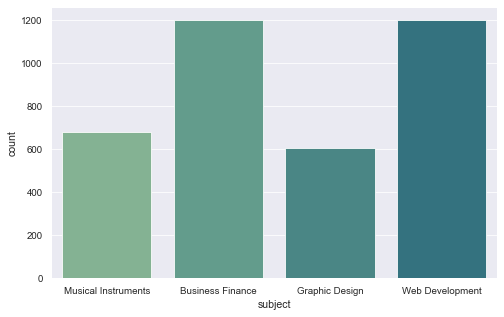

In [22]:
plt.figure(figsize = (8 , 5))
sns.countplot(data = df , x = 'subject')

### Q. 3) Show all the courses which are Free of Cost.

In [33]:
df[df['price'] == 'Free'].head().style.set_caption('Free Course')

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, Instantly!",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumming guitar',False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere de Experiencia!,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance


### Q. 4) Show all the courses which are Paid.

In [48]:
df[df['is_paid'] == True]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development


### Q. 5) Which are Top Selling Courses ?

In [52]:
df.sort_values(ascending = False , by = 'num_subscribers').head(1)['course_title'].loc[2230]

'Learn HTML5 Programming From Scratch'

<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

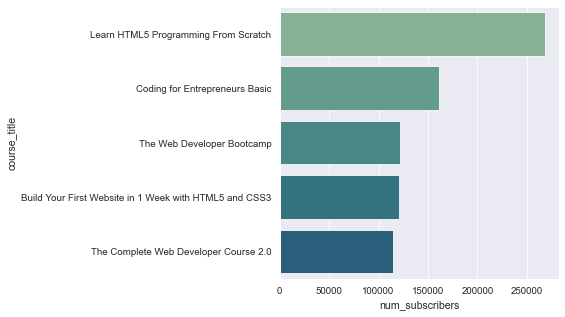

In [75]:
sns.barplot(data = df.sort_values(ascending = False , by = 'num_subscribers').head(5)
            , y = 'course_title' , x = 'num_subscribers')

### Q. 6) Which are Least Selling Courses ?


In [55]:
df.sort_values(ascending = True , by = 'num_subscribers').head(1)['course_title'].loc[649]

'Building a Balanced Scorecard'

<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

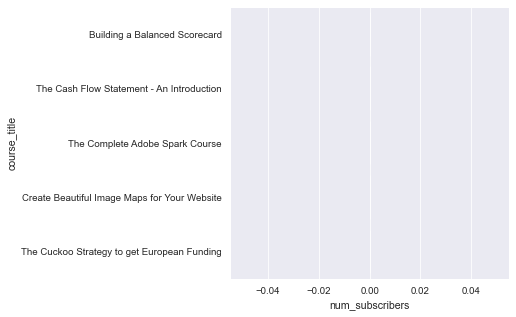

In [76]:
sns.barplot(data = df.sort_values(ascending = True , by = 'num_subscribers').head(5) ,
           y = 'course_title' , x = 'num_subscribers')

### Q. 7) Show all courses of Graphic Design where the price is below 100 ?


In [59]:
df['price'] = df['price'].apply(lambda x : '0' if x == 'Free' else x)

In [60]:
df['price'] = pd.to_numeric(df['price'] , errors = 'coerce')

In [62]:
df[(df['course_title'].str.contains('Graphic Design')) & (df['price'] < 100)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
205,368958,Advanced Graphic Design-Photoshop CC 2014 for ...,True,20,314,11,19,All Levels,1.5 hours,2014-12-19T05:55:57Z,Graphic Design
254,547190,Amazing Graphic Design for Beginners,True,20,32,10,5,Beginner Level,42 mins,2015-07-08T19:58:01Z,Graphic Design
308,837798,✔️ Illustrator CC : Be a Graphic Designer in I...,True,25,1456,62,77,All Levels,6.5 hours,2016-07-06T21:08:43Z,Graphic Design
407,559046,Basic Graphic Design for PowerPoint,True,20,88,8,14,Beginner Level,1 hour,2015-07-26T23:32:34Z,Graphic Design
436,280194,"Become a Graphic Designer, and earn a living f...",True,35,2354,12,37,All Levels,3 hours,2014-09-17T13:20:56Z,Graphic Design
442,278948,Become a Professional Graphic Designer,True,35,3618,345,207,All Levels,20.5 hours,2014-08-13T16:37:12Z,Graphic Design
1465,660876,Graphic Design - An Overview of the Field,False,0,23229,2215,12,Beginner Level,1 hour,2015-11-09T19:10:57Z,Graphic Design
1468,456988,Graphic Design Bootcamp: Professional Workflow...,True,20,99,10,9,All Levels,1.5 hours,2015-03-26T18:24:10Z,Graphic Design
1469,77532,Graphic Design for Entrepreneurs...Who Can't Draw,True,20,3903,51,13,Beginner Level,1.5 hours,2013-08-17T02:34:46Z,Graphic Design
1470,396204,Graphic Design Masterclass: Learn Graphic Desi...,True,95,6858,382,41,Beginner Level,3.5 hours,2015-11-09T21:17:04Z,Graphic Design


### Q. 8) List out all the courses that are related to 'Python'.


In [63]:
df[ df['course_title'].str.contains('Python')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11T22:09:24Z,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08T00:46:14Z,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08T20:57:35Z,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29T00:58:43Z,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,0,10917,319,25,All Levels,2 hours,2015-06-09T19:51:50Z,Web Development
1932,1038538,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22T00:11:22Z,Web Development
1969,902888,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,7 hours,2016-07-13T21:40:32Z,Business Finance
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09T15:37:56Z,Web Development
2295,1063722,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2 hours,2017-01-18T21:53:34Z,Web Development
2341,546848,Learn to code in Python and learn Adobe Photos...,True,50,1132,1,29,All Levels,2 hours,2015-07-08T00:15:12Z,Graphic Design


### Q. 9) What are courses that were published in the year 2015 ?


In [67]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [68]:
df['year'] = df['published_timestamp'].dt.year

In [71]:
df[df['year'] == 2015]['course_title'].to_frame()

,course_title
10,1 - Concepts of Statistics For Beginners Step ...
16,10 Numbers Every Business Owner Should Know
19,101 Blues riffs - learn how the harmonica supe...
23,16 Guitar Chords to Jam With - (Beginner - Int...
26,2 Easy Steps To Investment And Avoiding Traps
...,...
3675,Your First Course on Piano
3676,Your First Successful Forex Trades - With Case...
3677,Your Own Site in 45 Min: The Complete Wordpres...
3678,Your Second Course on Piano: Two Handed Playing


### Q. 10) What is the Max. Number of Subscribers for Each Level of courses ?


In [78]:
df.groupby('level')['num_subscribers'].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

<AxesSubplot:xlabel='level', ylabel='num_subscribers'>

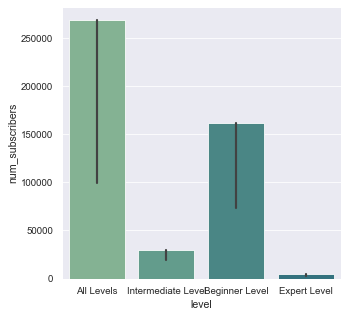

In [79]:
sns.barplot(data = df, x = 'level' , y = 'num_subscribers' , estimator = np.max)